In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def random_argmax(vector):
    """Returns the index of the max value, ties broken randomly."""
    max = np.amax(vector)
    indices = np.nonzero(vector == max)[0]
    return random.choice(indices)

In [3]:
gym.envs.registration.register(id='FrozenLake-v3', entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name':'4x4', 'is_slippery':False})
env = gym.make('FrozenLake-v3')

In [14]:
# Construct an empty table for Q values
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes=1000

rList = []
for i in range(num_episodes):
#     Reset environment to get start state
    cur_state = env.reset()
    rAll = 0
    done = False
    
    while not done:
#       Choose action for the current state
        action = random_argmax(Q[cur_state, :])
    
#       Get new state and reward
        new_state, reward, done, _ = env.step(action)
    
#       Update Q table
        Q[cur_state, action] = reward + np.max(Q[new_state,:])
        
        rAll += reward
        cur_state = new_state
        
    rList.append(rAll)

Success rate: 0.94
Final Q-TableValues
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


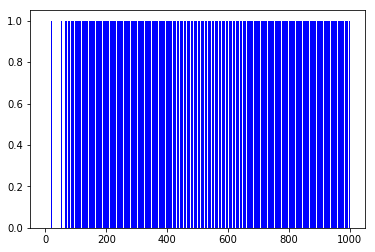

In [15]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-TableValues")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()